In [1]:
# import necessary modules
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
# read the data
df_all = pd.read_csv('./original data/A-lambda.csv')

In [3]:
# show the first 5 lines of df_all
df_all.head()

,λ (nm),A1,A2,A3,A4,A5,A6,A7,A8,A9,...,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11
0,400,0.0136,0.1951,0.3729,0.5366,0.6400,0.6367,0.6150,0.5534,0.5052,...,0.0973,0.1769,0.2590,0.2996,0.3133,0.2928,0.2722,0.2418,0.2196,0.1807
1,401,0.0135,0.1934,0.3701,0.5335,0.6374,0.6344,0.6127,0.5510,0.5027,...,0.0966,0.1759,0.2579,0.2986,0.3123,0.2919,0.2713,0.2406,0.2182,0.1792
2,402,0.0134,0.1919,0.3676,0.5309,0.6352,0.6322,0.6105,0.5488,0.5002,...,0.0961,0.1751,0.2571,0.2978,0.3115,0.2910,0.2702,0.2394,0.2168,0.1776
3,403,0.0133,0.1905,0.3655,0.5284,0.6330,0.6302,0.6083,0.5465,0.4975,...,0.0956,0.1744,0.2562,0.2970,0.3106,0.2900,0.2691,0.2381,0.2152,0.1758
4,404,0.0132,0.1893,0.3636,0.5263,0.6310,0.6283,0.6060,0.5439,0.4944,...,0.0952,0.1737,0.2554,0.2963,0.3098,0.2890,0.2678,0.2366,0.2134,0.1737


In [4]:
# select corresponding columns and turn them to lists
lambda_list = df_all['λ (nm)'].tolist()
A1 = df_all['A1'].tolist()
A2 = df_all['A2'].tolist()
A3 = df_all['A3'].tolist()
A4 = df_all['A4'].tolist()
A5 = df_all['A5'].tolist()
A6 = df_all['A6'].tolist()
A7 = df_all['A7'].tolist()
A8 = df_all['A8'].tolist()
A9 = df_all['A9'].tolist()
A10 = df_all['A10'].tolist()
A11 = df_all['A11'].tolist()
B1 = df_all['B1'].tolist()
B2 = df_all['B2'].tolist()
B3 = df_all['B3'].tolist()
B4 = df_all['B4'].tolist()
B5 = df_all['B5'].tolist()
B6 = df_all['B6'].tolist()
B7 = df_all['B7'].tolist()
B8 = df_all['B8'].tolist()
B9 = df_all['B9'].tolist()
B10 = df_all['B10'].tolist()
B11 = df_all['B11'].tolist()

## 1. Absorbance-wavelength

### 1.1 group 1

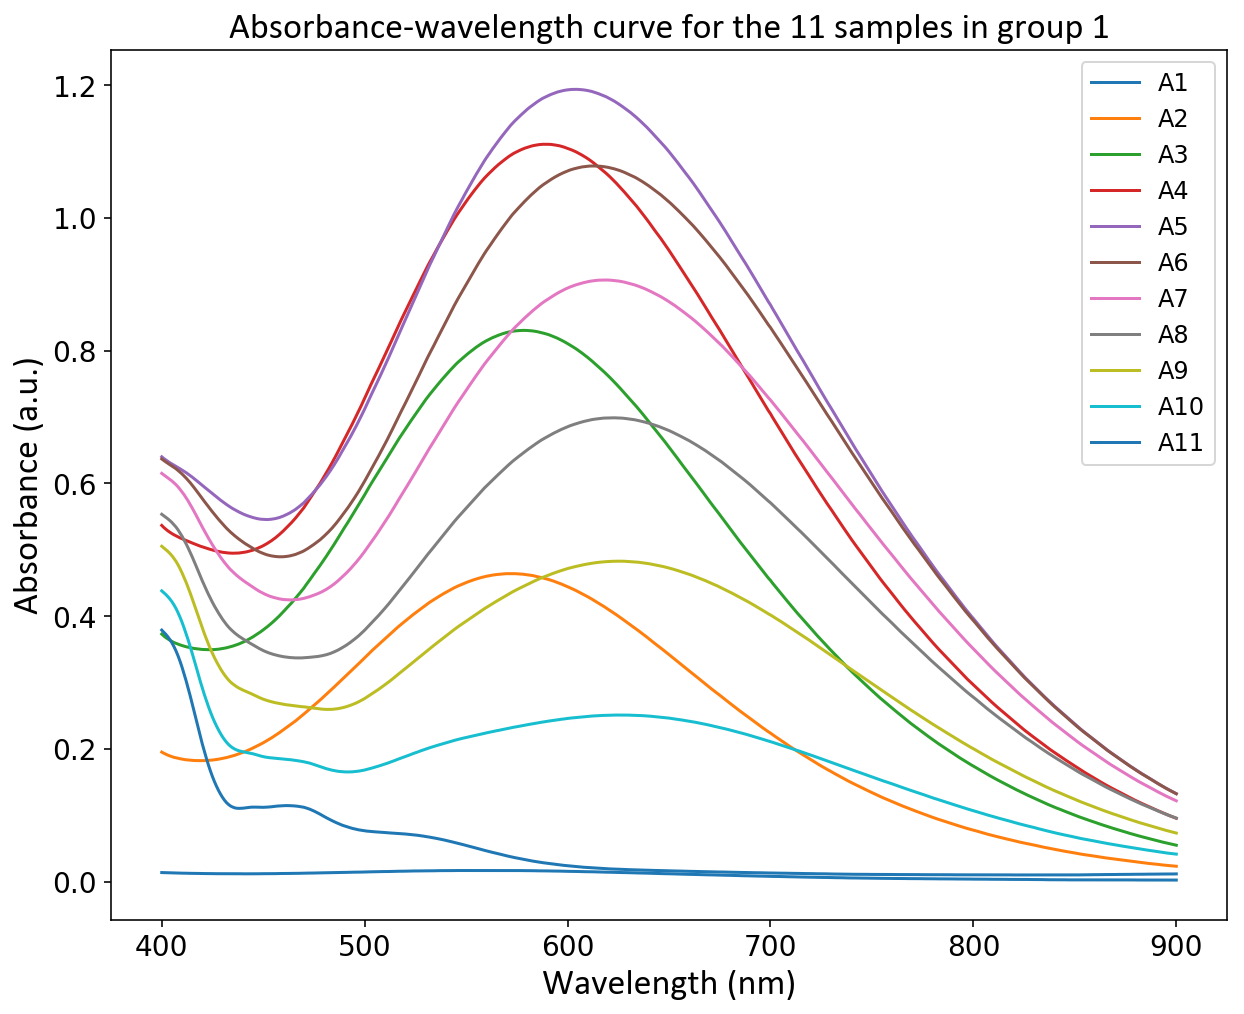

In [5]:
# plot for group 1
%matplotlib inline
%config InlineBackend.figure_format='retina'
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(lambda_list, A1)
ax.plot(lambda_list, A2)
ax.plot(lambda_list, A3)
ax.plot(lambda_list, A4)
ax.plot(lambda_list, A5)
ax.plot(lambda_list, A6)
ax.plot(lambda_list, A7)
ax.plot(lambda_list, A8)
ax.plot(lambda_list, A9)
ax.plot(lambda_list, A10)
ax.plot(lambda_list, A11)
ax.legend(['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11'], fontsize=12)
ax.set_xlabel('Wavelength (nm)', fontname = 'Calibri', fontsize = 18)
ax.set_ylabel('Absorbance (a.u.)', fontname = 'Calibri', fontsize = 18)
plt.title('Absorbance-wavelength curve for the 11 samples in group 1', fontname = 'Calibri', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

### 1.2 group 2

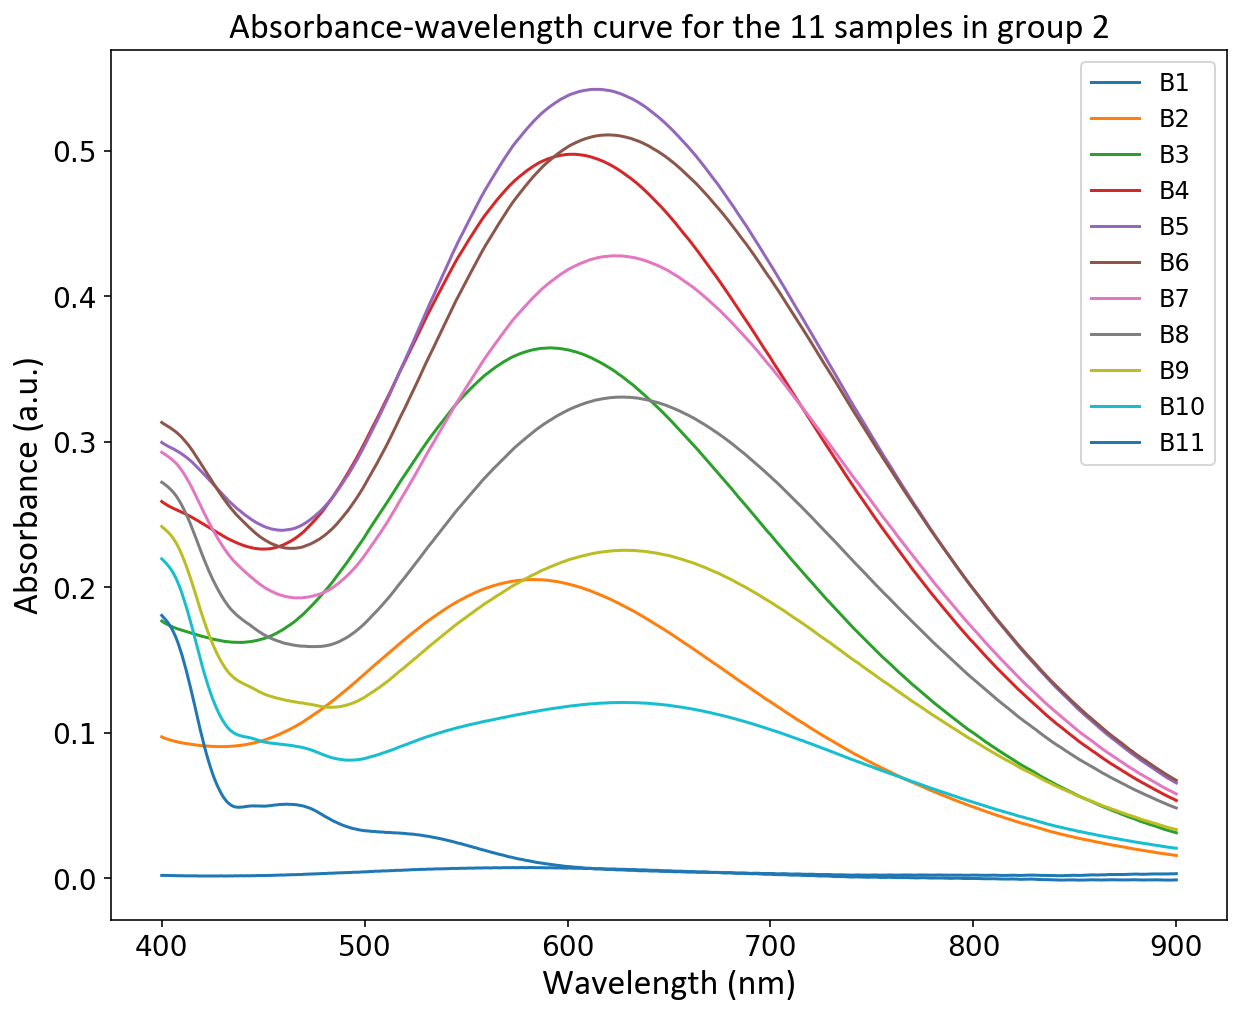

In [6]:
# plot for group 2
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(lambda_list, B1)
ax.plot(lambda_list, B2)
ax.plot(lambda_list, B3)
ax.plot(lambda_list, B4)
ax.plot(lambda_list, B5)
ax.plot(lambda_list, B6)
ax.plot(lambda_list, B7)
ax.plot(lambda_list, B8)
ax.plot(lambda_list, B9)
ax.plot(lambda_list, B10)
ax.plot(lambda_list, B11)
ax.legend(['B1','B2','B3','B4','B5','B6','B7','B8','B9','B10','B11'], fontsize=12)
ax.set_xlabel('Wavelength (nm)', fontname = 'Calibri', fontsize = 18)
ax.set_ylabel('Absorbance (a.u.)', fontname = 'Calibri', fontsize = 18)
plt.title('Absorbance-wavelength curve for the 11 samples in group 2', fontname = 'Calibri', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

## 2. Apparent absorbance

### 2.1 group 1

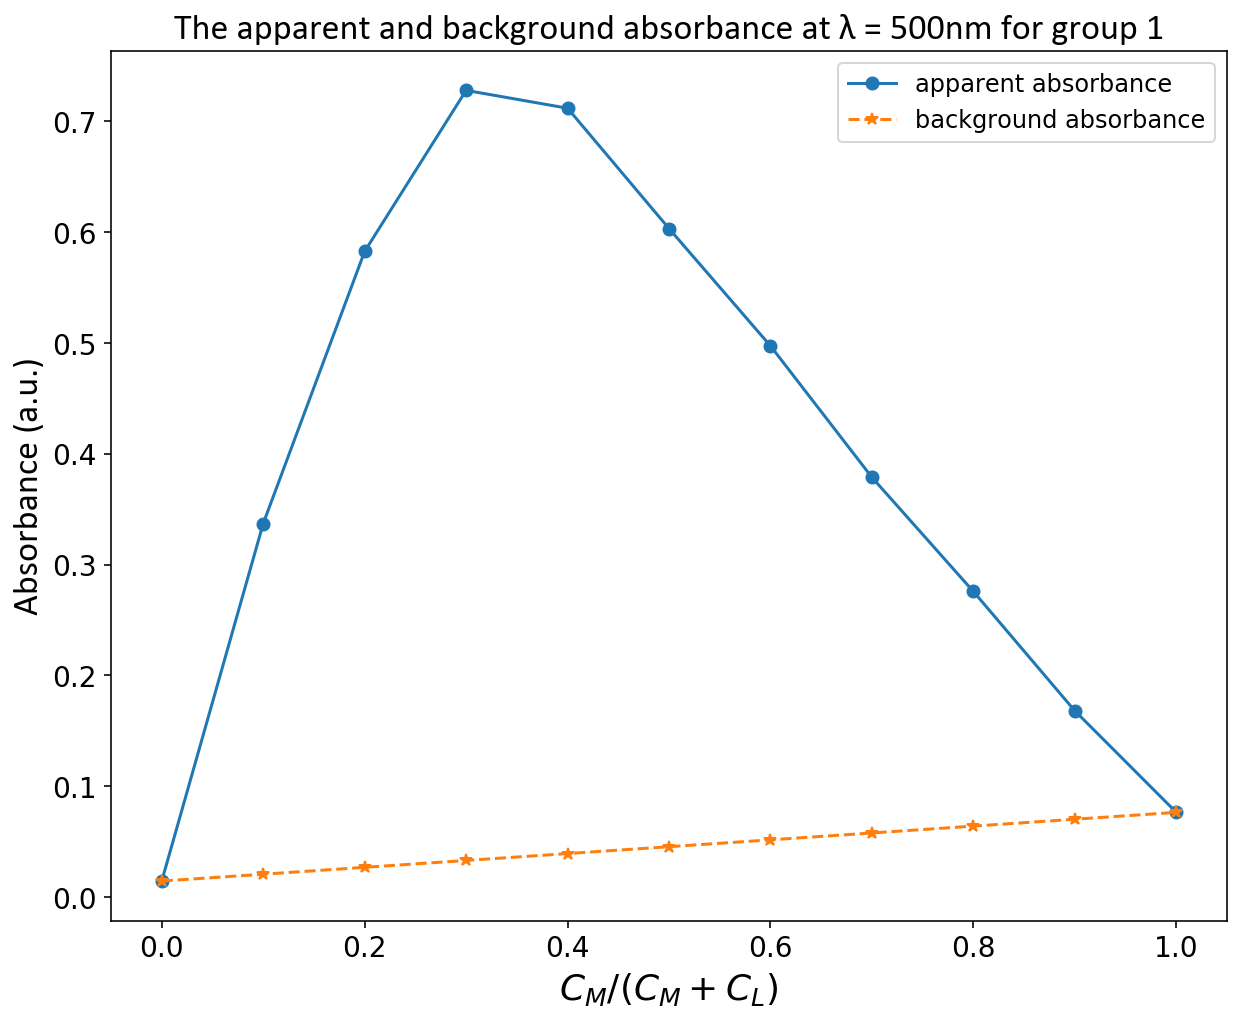

In [7]:
# plot for apparent absorbance at λ = 500nm, group 1
# the x-axis: CM/(CM + CL)
x_list = [round(0.1*i, 2) for i in range(11)]
# find the index where λ = 500nm
index_500 = df_all[df_all['λ (nm)']==500].index.tolist()[0]
original_A_group1 = [
    A1[index_500], A2[index_500], A3[index_500], A4[index_500], A5[index_500], A6[index_500],
    A7[index_500], A8[index_500], A9[index_500], A10[index_500], A11[index_500]
]
# define the background absorbance function, which should be subtracted from the apparent a.u.
def Background_Group1(x):
    # the slope
    k = (original_A_group1[-1]-original_A_group1[0])/(x_list[-1]-x_list[0])
    # the intercept
    b = original_A_group1[0]
    return k*x+b
# background absorbance list
ba_list_group1 = [Background_Group1(x) for x in x_list]
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x_list, original_A_group1, '-o')
ax.plot(x_list, ba_list_group1, '--*')
ax.legend(['apparent absorbance', 'background absorbance'], fontsize = 12)
ax.set_xlabel('$C_{M}/(C_{M}+C_{L})$', fontname = 'Calibri', fontsize = 18)
ax.set_ylabel('Absorbance (a.u.)', fontname = 'Calibri', fontsize = 18)
plt.title('The apparent and background absorbance at λ = 500nm for group 1', fontname = 'Calibri', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()
plt.show()

### 2.2 group 2

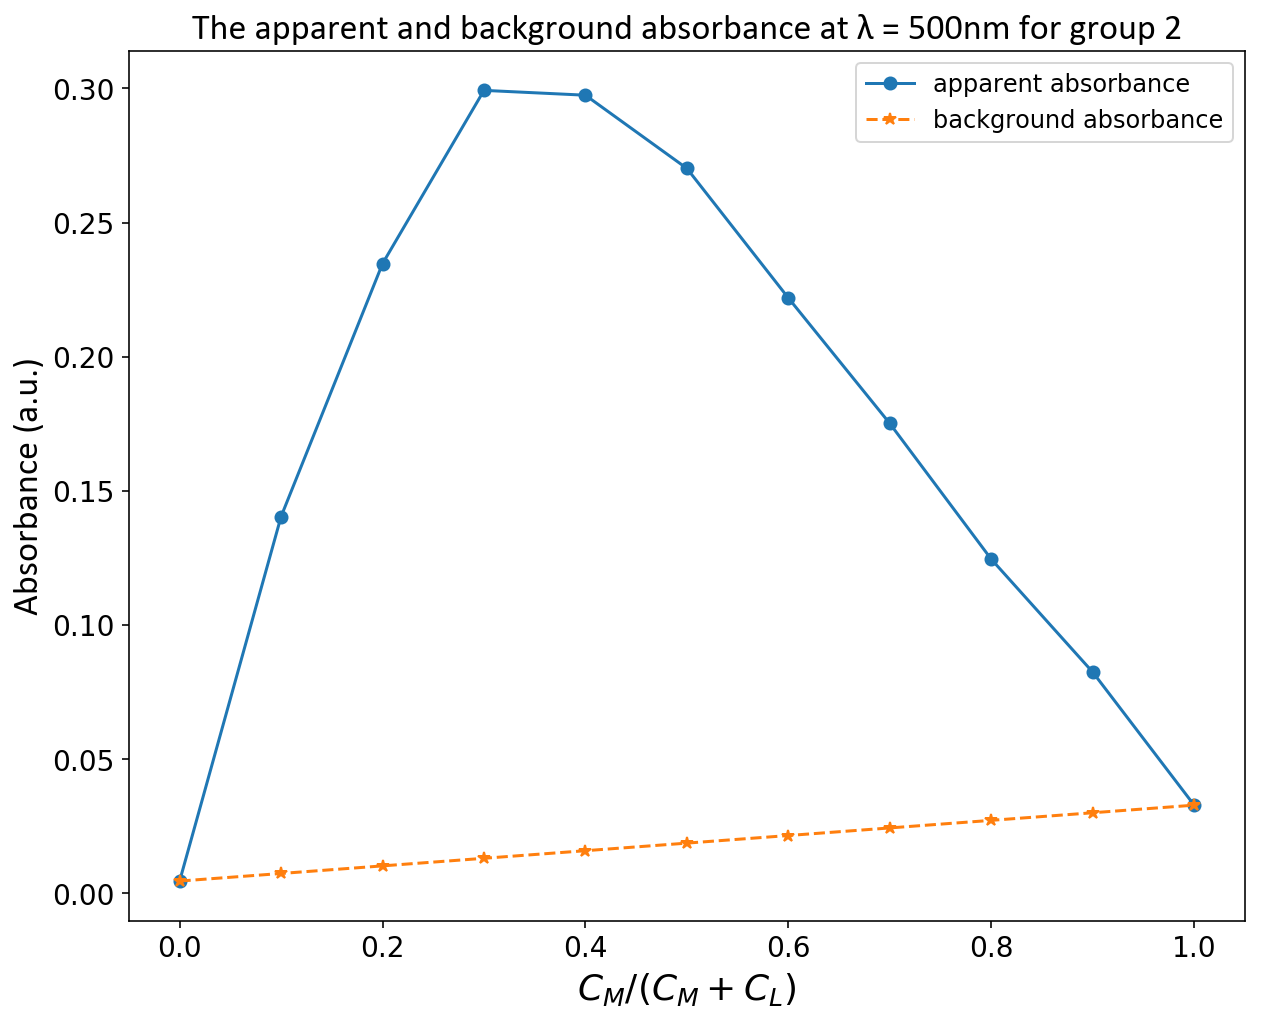

In [8]:
# plot for apparent absorbance at λ = 500nm, group 2
# the x-axis: CM/(CM + CL)
x_list = [round(0.1*i, 2) for i in range(11)]
# find the index where λ = 500nm
index_500 = df_all[df_all['λ (nm)']==500].index.tolist()[0]
original_A_group2 = [
    B1[index_500], B2[index_500], B3[index_500], B4[index_500], B5[index_500], B6[index_500],
    B7[index_500], B8[index_500], B9[index_500], B10[index_500], B11[index_500]
]
# define the background absorbance function, which should be subtracted from the apparent a.u.
def Background_Group2(x):
    # the slope
    k = (original_A_group2[-1]-original_A_group2[0])/(x_list[-1]-x_list[0])
    # the intercept
    b = original_A_group2[0]
    return k*x+b
# background absorbance list
ba_list_group2 = [Background_Group2(x) for x in x_list]
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x_list, original_A_group2, '-o')
ax.plot(x_list, ba_list_group2, '--*')
ax.legend(['apparent absorbance', 'background absorbance'], fontsize = 12)
ax.set_xlabel('$C_{M}/(C_{M}+C_{L})$', fontname = 'Calibri', fontsize = 18)
ax.set_ylabel('Absorbance (a.u.)', fontname = 'Calibri', fontsize = 18)
plt.title('The apparent and background absorbance at λ = 500nm for group 2', fontname = 'Calibri', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()
plt.show()

## 3. Rectified absorbance

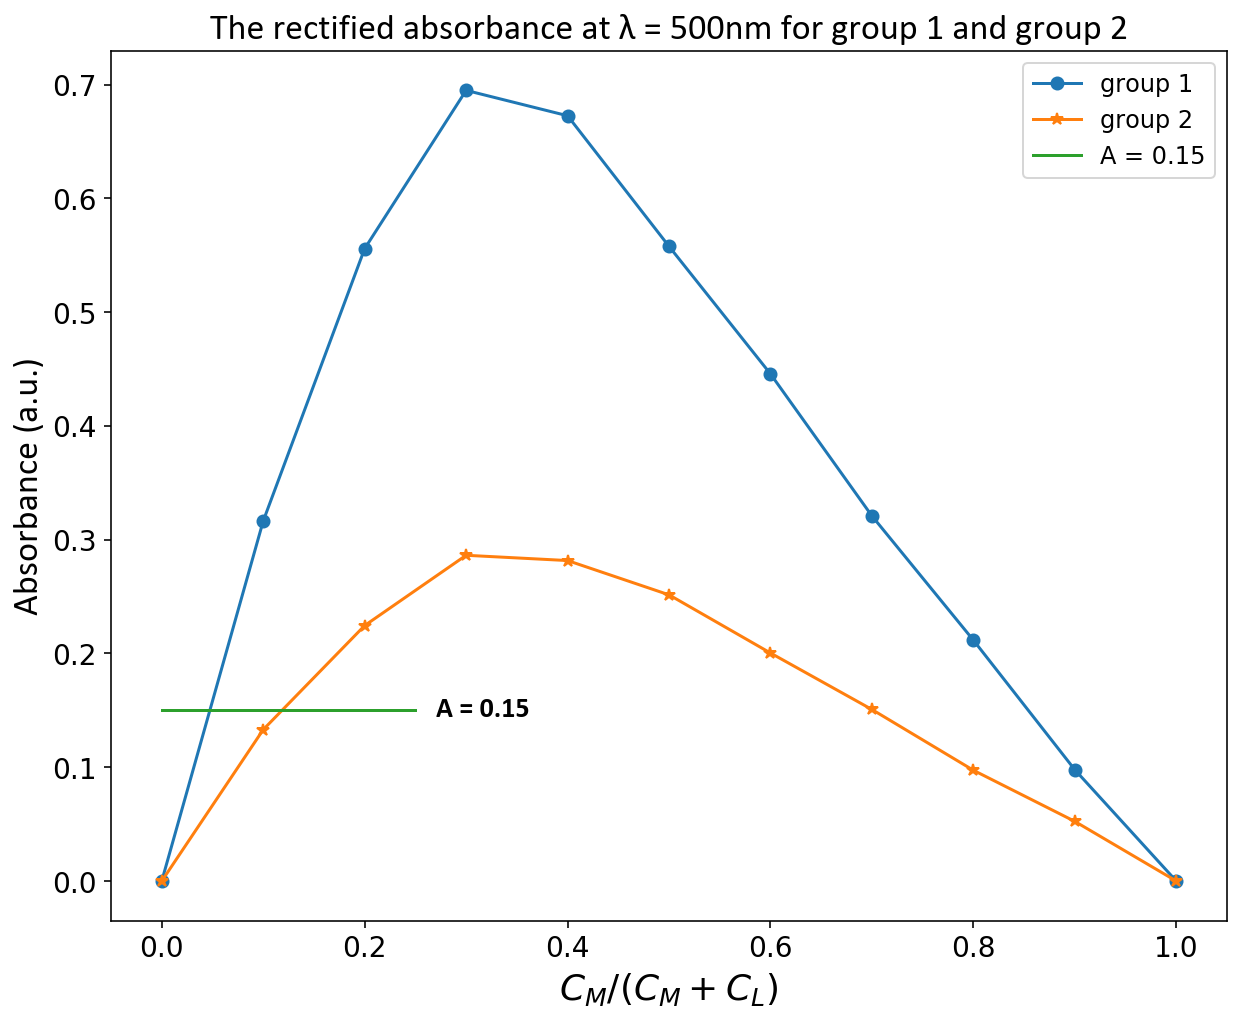

In [21]:
# rectified absorbance for group 1
ra_list_group1 = [original_A_group1[i]-ba_list_group1[i] for i in range(len(x_list))]
# rectified absorbance for group 2
ra_list_group2 = [original_A_group2[i]-ba_list_group2[i] for i in range(len(x_list))]
# plot for the rectified absorbance
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x_list, ra_list_group1, '-o')
ax.plot(x_list, ra_list_group2, '-*')
ax.plot(np.linspace(0,0.25,100), [0.15 for i in range(100)])
ax.legend(['group 1', 'group 2', 'A = 0.15'], fontsize = 12)
ax.set_xlabel('$C_{M}/(C_{M}+C_{L})$', fontname = 'Calibri', fontsize = 18)
ax.set_ylabel('Absorbance (a.u.)', fontname = 'Calibri', fontsize = 18)
plt.annotate(s = 'A = 0.15', xy = (0.25, 0.15), xytext = (0.27, 0.145), fontsize = 14, fontname = 'Calibri', weight = 'black')
plt.title('The rectified absorbance at λ = 500nm for group 1 and group 2', fontname = 'Calibri', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()
plt.show()

Here when A reaches its maximum, $\frac{C_{M}}{C_{M}+C_{L}}=0.3$, therefore $n=C_{L}/C_{M}\approx 2$

The two intersection points are: (0.0475, 0.15) and (0.1186, 0.15)

According to the equation $$K = \frac{y}{(C_{M1}-y)(C_{L1}-ny)^{n}} = \frac{y}{(C_{M2}-y)(C_{L2}-ny)^{n}}$$

$$y = 0.023573，K = 723$$